In [2]:
# Import relevant packages

import uproot # conda install -c conda-forge uproot
import vector # conda install -c conda-forge vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-v0_8-colorblind')

In [3]:
def get_min_cost(cost, compatible1, compatible2, min_compatible):
    n = len(cost)
    dp = [[float('inf')] * (n + 1) for _ in range(min_compatible + 1)]
    dp[0][0] = 0

    for i in range(1, min_compatible + 1):
        for j in range(1, n + 1):
            if i > j:
                dp[i][j] = float('inf')
            elif compatible1[j - 1] and compatible2[j - 1]:
                dp[i][j] = min(dp[i][j - 1], dp[i - 1][j - 1] + cost[j - 1])
            else:
                if i == min_compatible:
                    dp[i][j] = dp[i][j - 1]
                else:
                    dp[i][j] = float('inf')

    if dp[min_compatible][n] == float('inf'):
        return -1
    else:
        return dp[min_compatible][n]



cost = [3, 4, 5, 6,3,2,10 ]
compatible1 = [1, 1, 0, 1,1,1,0]
compatible2 = [0,0,1,0,1,1,0]
min_compatible = 3

print(get_min_cost(cost, compatible1, compatible2, min_compatible))


-1


In [4]:
import json
import awkward as ak
import pathlib
al = ak.from_json(pathlib.Path("outputNewDataBIB.json"))
al2 = ak.from_json(pathlib.Path("outputNewDataBIB2.json"))



In [5]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label=""):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    else: data_flat = (data)
    
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.yscale(scale)
    plt.show()

    # a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label=""):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)

    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    plt.show()

In [6]:

def compare1DHistograms(datas,bins,scale='linear',label="",leg=[]):

    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    
    for i,data in enumerate(datas): 

        # handle data, there must be a smarter way to do this...
        if type(data[0])==np.int64   : data_flat=data
        elif type(data[0])==np.float32 : data_flat=data
        else : data_flat = ak.flatten(data, axis=None)
        counts, bins, bars = ax.hist(data_flat, bins, alpha=0.5, label=leg[i] if len(leg)>i else "")
        print(counts)
   
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title("1D Comparison between matched and truth muons (BIB)")
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.legend()
    plt.yscale(scale)
    plt.show()

[[39.2], [1.18], [32.7], [25.4], [4.74], ..., [47.4], [5.94], [3.82], [28]]
[ 19. 129. 138. 116. 114. 128. 134. 122. 121. 118. 157. 129. 121. 126.
 111.  89. 101. 114. 101. 117. 130. 111. 118. 103. 109. 139. 115. 126.
 119. 138. 119. 122. 121. 119. 132. 112. 123. 140. 136. 114. 133. 128.
 120. 125. 130. 126. 131. 120. 124.]
[ 0.  0.  0.  2.  4. 15. 12. 20. 18. 23. 23. 25. 21. 23. 26. 23. 26. 18.
 23. 21. 25. 24. 20. 21. 26. 37. 29. 34. 27. 33. 36. 37. 52. 38. 47. 36.
 53. 57. 63. 39. 46. 54. 56. 64. 54. 64. 58. 56. 63.]


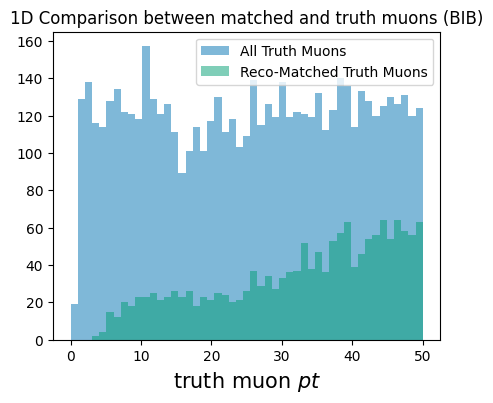

[  0.   0.   0.   0.   0.   6.  97. 148. 188. 243. 331. 442. 554. 611.
 606. 587. 565. 466. 328. 242. 213. 134. 125.   2.   0.   0.   0.   0.
   0.]
[  0.   0.   0.   0.   0.   5.  85. 132. 158. 166.  49. 155.  56.   0.
  54.   0.   6. 143.  41. 140. 169. 110. 101.   2.   0.   0.   0.   0.
   0.]


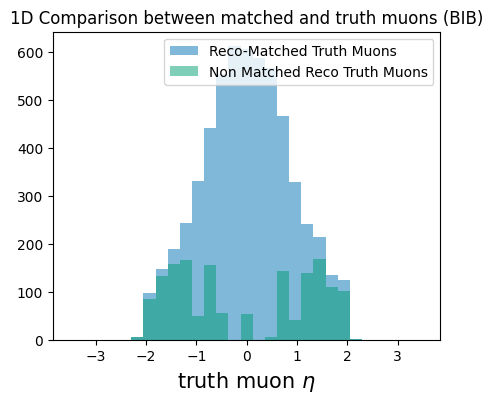

[  0. 132. 239. 218. 247. 205. 234. 229. 201. 236. 240. 208. 235. 222.
 215. 247. 247. 229. 210. 205. 212. 214. 232. 221. 212. 235. 242. 121.
   0.]
[ 0. 30. 67. 67. 69. 55. 69. 60. 54. 54. 73. 60. 59. 55. 62. 60. 71. 65.
 64. 53. 51. 55. 56. 55. 57. 60. 62. 29.  0.]


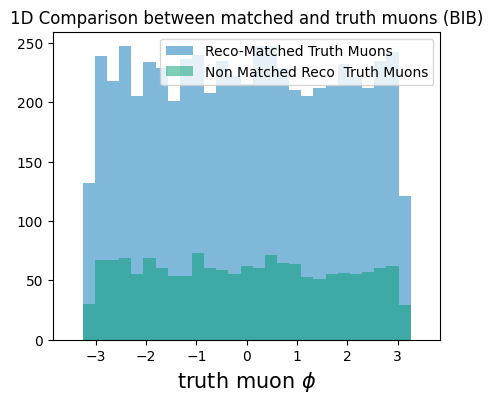

In [7]:
# Steps towards efficiency
import numpy as np
print(al["mcp_pt"])
a = np.concatenate([al["mcp_pt"],al2["mcp_pt"]])
b = np.concatenate([al["mcp_mu_match_pt"],al2["mcp_mu_match_pt"]])

arrays = [a,b]




legend = [ "All Truth Muons","Reco-Matched Truth Muons"]
compare1DHistograms(arrays, bins=np.linspace(0,50,50), leg=legend, label=";truth muon $pt$")

c = np.concatenate([al["mcp_eta"],al2["mcp_eta"]])
d = np.concatenate([al["mcp_mu_match_eta"],al2["mcp_mu_match_eta"]])

arrays = [c,d]
legend = [ "Reco-Matched Truth Muons","Non Matched Reco Truth Muons"]
compare1DHistograms(arrays, bins=np.linspace(-3.5,3.5,30), leg=legend, label=";truth muon $\eta$")

e = np.concatenate([al["mcp_phi"],al2["mcp_phi"]])
f = np.concatenate([al["mcp_mu_match_phi"],al2["mcp_mu_match_phi"]])


arrays = [e,f]
legend = [ "Reco-Matched Truth Muons","Non Matched Reco  Truth Muons"]
compare1DHistograms(arrays, bins=np.linspace(-3.5,3.5,30), leg=legend, label=";truth muon $\phi$")


In [8]:
import numpy as np
def plotEff(data1, data2,bins, scale='linear',label=""):
        fig = plt.figure(figsize=(5,4))
        ax = fig.add_subplot(111)
        data = ak.to_list(ak.flatten(data1, axis=None))
        d3 = ak.to_list(ak.flatten(data2, axis=None))
   
        x =  np.histogram(d3, bins)
        y1 = x[0]
        x3 = x[1]
        y1 = y1[:len(y1)]
        print(y1)
   
        x2 = np.histogram(data, bins)
        x1 = x2[1]
        y2 = x2[0]
        x1 = x1[:len(x1)-1]
        print(y2)
        arr = []
        for i in range(len(y2)):
                if y1[i] == 0:
                        y1[i] = 1
                z = float(y2[i])/y1[i]
                if z >= 1:
                        z = 1.0

                arr.append(z)

        

        error = np.sqrt(arr)/np.sqrt(50)
        wid = (max(bins)-min(bins))/len(bins)
        print(wid)

        
        ax.errorbar(x1, arr,error, marker='o',markersize='3', linestyle='')

      
        # handle labels
        title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
        xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
        ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
        
        ax.set_title("Reconstruction Efficency for V1 Muon Collider (BIB)")
        ax.set_xlabel(xlabel, fontsize=15)
        ax.set_ylabel(ylabel, fontsize=15)
        plt.yscale(scale)
        plt.show()

[93 90 76 94 87 82 88 93 90 90 83 56 67 72 81 93 80 75 78 87 75 96 83 89
 86 97 93 84 81 92 87 83 79 98 78 77 99 87 77]
[ 0  0  2 11 12 15 11 15 24 15 15 14 14 15 14 22 15  9  9 23 20 31 13 24
 25 42 29 28 28 36 39 22 32 45 35 37 42 39 40]
1.225


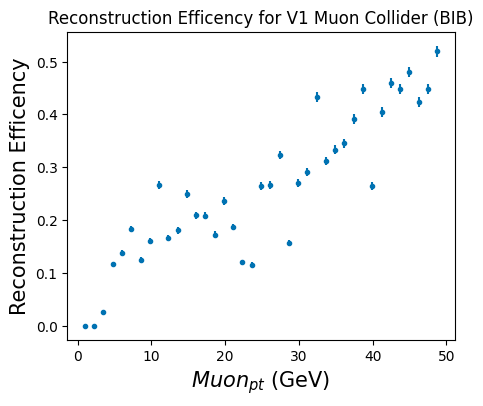

In [9]:
plotEff(al["mcp_mu_match_pt"],al["mcp_pt"],bins=np.linspace(1,50,40),label=";$Muon_{pt} $ (GeV);Reconstruction Efficency")

[76 44 70 65 56 71 79 72 81 51 71 87 64 75 57 67 73 74 82 75 56 68 60 74
 68 85 56 50 79]
[20 14 16 11 19 15 16 23 30 10 27 22 11 18 17 18 20 19 23 18 15 26 13 18
 18 19 17 11 21]
0.12666666666666665


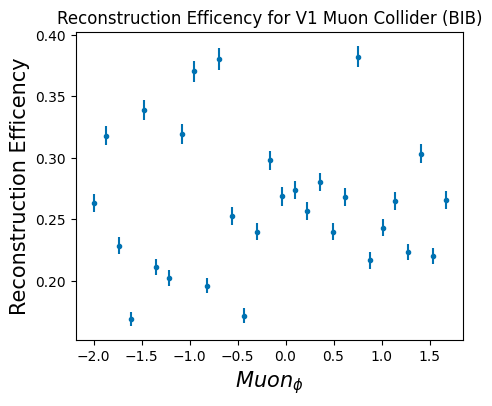

In [38]:
plotEff(al["mcp_mu_match_phi"],al["mcp_phi"],bins=np.linspace(-2,1.8,30),label=";$Muon_{\phi} $;Reconstruction Efficency")

[ 36  44  48  45  72  67  83 102 125 150 160 183 193 204 209 206 179 195
 171 143 149 111  92  65  73  54  42  46  37]
[32 41 43 34 62 50 31  2 53 54 32  1  0  0 37  0  0  1  3 36 56  3 27 45
 55 44 32 40 26]
0.13333333333333333


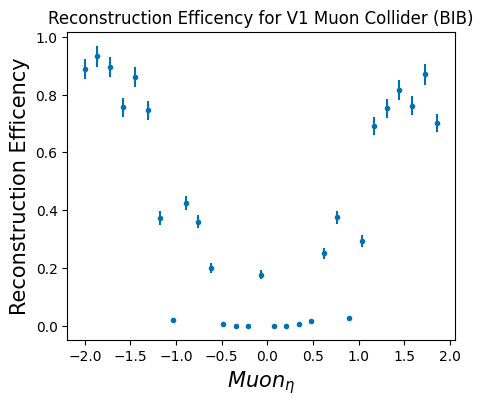

In [26]:
plotEff(al["mcp_mu_match_eta"],al["mcp_eta"],bins=np.linspace(-2,2,30),label=";$Muon_{\eta} $;Reconstruction Efficency")

[  0  73 134 111 133 110 131 115 103 140 141 116 148 119 114 139 146 113
 124 127 128 123 127 127 128 140 137  65   0]
[ 0 16 34 35 41 25 35 28 28 27 47 38 36 27 32 37 37 36 33 34 29 35 26 35
 29 30 36 16  0]
0.23333333333333334


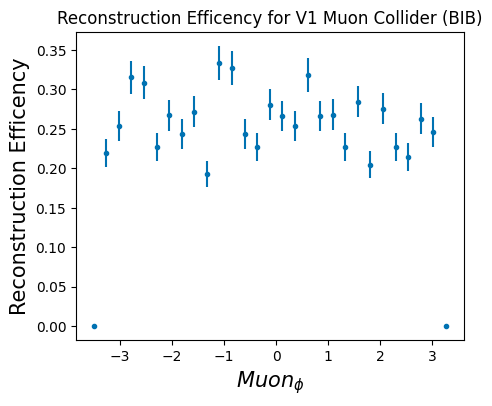

In [27]:
plotEff(al["mcp_mu_match_phi"],al["mcp_phi"],bins=np.linspace(-3.5,3.5,30),label=";$Muon_{\phi} $;Reconstruction Efficency")

0.0875


/var/folders/2j/_zfm4bxj0cl90wmtwhzby29h0000gn/T/ipykernel_56289/3944411019.py:17: RuntimeWarning: invalid value encountered in divide
  y2 = y2/y1


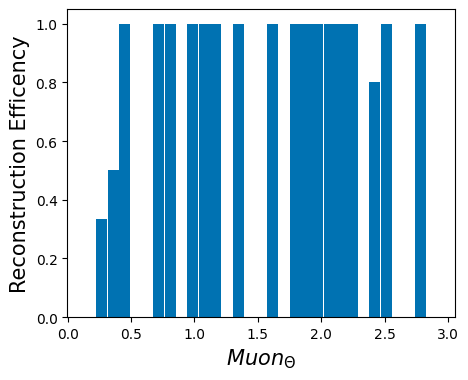

In [174]:
plotEff(recodMuons.theta,truthMuons.theta,bins=np.linspace(0,3.5,40),label=";$Muon_{\Theta} $;Reconstruction Efficency")

<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
